In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run ../helper/preprocess.py
%run ../helper/aggregate.py
%run ../helper/utils.py

In [2]:
import matplotlib.pyplot as plt


def plot_metrics_xy(data_frame,
                    metric_1,
                    metric_2,
                    save_name=None):

    # Define some markers for differentiation
    markers = [
        'o', 's', '^', 'D', 'v', '*', 'p', 'X', 'H', '<', '>', '1', '2', '3',
        '4'
    ]

    # Define some colors for differentiation.
    # This is an arbitrary set of colors. Consider updating these colors as per your preference.
    colors = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1a55FF', '#5c3a7a',
        '#000075', '#9A6324', '#000000'
    ]

    # Extract means and stds for the two metrics
    metric_1_mean = metric_1 + ('mean',)
    metric_2_mean = metric_2 + ('mean',)
    metric_1_stderr = metric_1 + ('stderr',)
    metric_2_stderr = metric_2 + ('stderr',)

    x_columns = ['Config', 'Step']
    data_frame['combined_x'] = data_frame[x_columns].astype(str).agg(
        ' - '.join, axis=1)
    unique_groups = data_frame['combined_x'].unique()

    for idx, group in enumerate(unique_groups):
        sub_df = data_frame[data_frame['combined_x'] == group]
        x = sub_df[metric_1_mean]
        y = sub_df[metric_2_mean]
        x_err = sub_df[metric_1_stderr]
        y_err = sub_df[metric_2_stderr]
        marker = markers[idx % len(markers)]  # Cycle through markers
        color = colors[idx % len(colors)]  # Cycle through colors
        plt.errorbar(x,
                     y,
                     xerr=x_err,
                     yerr=y_err,
                     fmt=marker,
                     color=color,
                     label=group,
                     capsize=5,
                     ms=6,
                     mew=2)

    plt.xlabel(metric_1)
    plt.ylabel(metric_2)
    plt.legend(loc="best")
    plt.title(f"{metric_1} vs {metric_2} with Error Bars")
    plt.grid(True)
    if save_name is not None:
        plt.savefig(save_name)

In [4]:
metrics_file = '../metrics/ddim_sd15_metrics.csv'
config_file = '../../exp_configs/config_mapping.csv'
metrics_to_include = [
    ('Text Similarity', 'CLIP', 'in'),
    ('Text Similarity', 'CLIP', 'out'),
    ('Text Similarity', 'CLIP', 'trigger'),
    ('Image Similarity', 'DINOv2-padding', 'in'),
    ('Image Similarity', 'DINOv2-padding', 'out'),
    ('Image Similarity', 'DINOv2-padding', 'trigger'),
    ('Image Similarity', 'CLIP-padding', 'in'),
    ('Image Similarity', 'CLIP-padding', 'out'),
    ('Squared Centroid Distance', 'DINOv2-padding', 'in'),
    ('Squared Centroid Distance', 'DINOv2-padding', 'out'),
    ('Squared Centroid Distance', 'DINOv2-padding', 'trigger'),
    ('Squared Centroid Distance', 'CLIP-padding', 'in'),
    ('Squared Centroid Distance', 'CLIP-padding', 'out'),
    ('Vendi', 'DINOv2', 'in'),
    ('Vendi', 'DINOv2', 'out'),
    ('Vendi', 'DINOv2', 'trigger'),
]
# keywords_to_exclude = ['Prodigy', '1054', '1057', 'scalar']
# keywords_to_exclude = []

metrics_processed = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=None)

with display_all_columns():
    display(metrics_processed)

Config  Algo    Preset     Lr      Dim  \
Architecture                                                                 
Condition                                                                    
0             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
1             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
2             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
3             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
4             exp-1016-sd15-loha4a2-lr1e-3  loha  attn-mlp  0.001      4.0   
...                                    ...   ...       ...    ...      ...   
22108          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22109          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22110          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22111          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   
22112          exp-1027-sd15-lokrf8-lr5e-3  lokr  attn-mlp  0.005  10000.0   

             Alpha Factor Seed Step Category          Class   Subclass  \
Architecture                                                             
Condition                                                                
0              2.0    NaN    a   10    scene    scene_canal              
1              2.0    NaN    a   10    scene    scene_canal              
2              2.0    NaN    a   10    scene    scene_canal              
3              2.0    NaN    a   10    scene   scene_garden              
4              2.0    NaN    a   10    scene   scene_garden              
...            ...    ...  ...  ...      ...            ...        ...   
22108          1.0    8.0    b   30   people  Admiral_Piett  reaslitic   
22109          1.0    8.0    b   30   people  Admiral_Piett  reaslitic   
22110          1.0    8.0    b   30   people  Admiral_Piett   figurine   
22111          1.0    8.0    b   30   people  Admiral_Piett   figurine   
22112          1.0    8.0    b   30   people  Admiral_Piett   figurine   

             Image Similarity                                               \
Architecture     CLIP-padding           DINOv2-padding                       
Condition                  in       out             in       out   trigger   
0                    0.813830  0.856383       0.797872  0.888298  0.590426   
1                    0.813830  0.856383       0.797872  0.888298  0.590426   
2                    0.813830  0.856383       0.797872  0.888298  0.590426   
3                    0.962766  0.579787       0.803191  0.425532  0.664894   
4                    0.962766  0.579787       0.803191  0.425532  0.664894   
...                       ...       ...            ...       ...       ...   
22108                0.069149  0.946809       0.063830  0.978723  0.069149   
22109                0.069149  0.946809       0.063830  0.978723  0.069149   
22110                0.659574  0.962766       0.436170  1.000000  0.398936   
22111                0.659574  0.962766       0.436170  1.000000  0.398936   
22112                0.659574  0.962766       0.436170  1.000000  0.398936   

             Squared Centroid Distance                                     \
Architecture              CLIP-padding           DINOv2-padding             
Condition                           in       out             in       out   
0                             0.851064  0.978723       0.851064  1.000000   
1                             0.851064  0.978723       0.851064  1.000000   
2                             0.851064  0.978723       0.851064  1.000000   
3                             0.925532  0.680851       0.691489  0.638298   
4                             0.925532  0.680851       0.691489  0.638298   
...                                ...       ...            ...       ...   
22108                         0.005319  0.271277       0.000000  0.085106   
22109                         0.005319  0.2

## Preset

### Step = 50

In [98]:
keywords = [
    "full", "attnonly", "1001", "1011", "1021"
]
keyword_condition = metrics_processed['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered = metrics_processed[keyword_condition]
metrics_filtered = metrics_filtered[metrics_filtered['Step'] == 50]
metrics_aggregated = aggregate_metrics(metrics_filtered, level='All', group_seeds=True)

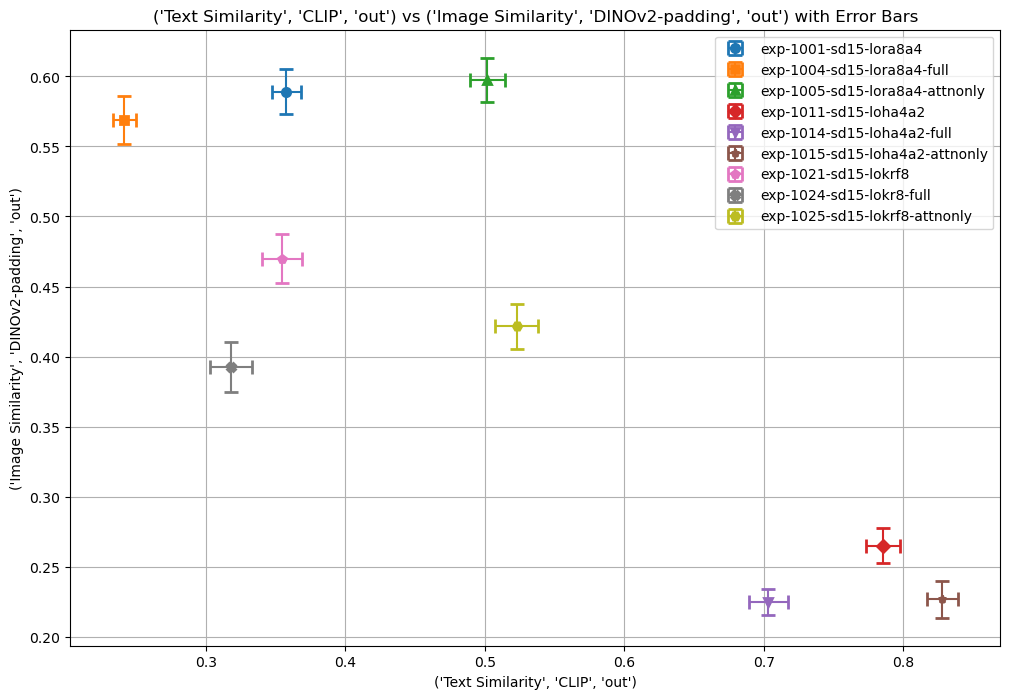

In [101]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')

plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

### Step=30

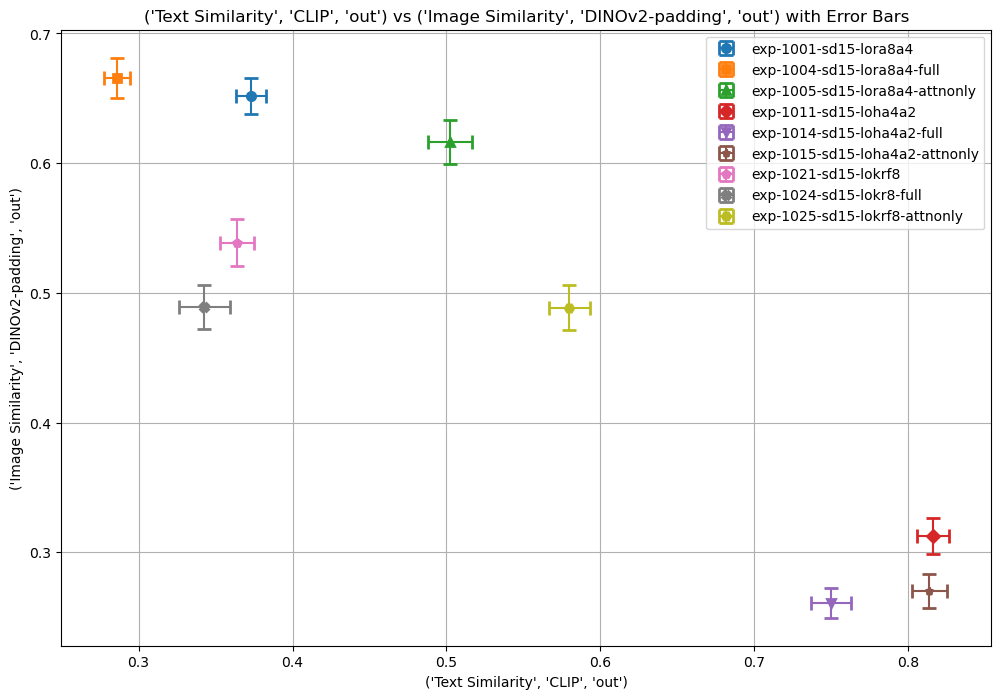

In [102]:
keywords = [
    "full", "attnonly", "1001", "1011", "1021"
]
keyword_condition = metrics_processed['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered = metrics_processed[keyword_condition]
metrics_filtered = metrics_filtered[metrics_filtered['Step'] == 30]
metrics_aggregated = aggregate_metrics(metrics_filtered, level='All', group_seeds=True)

plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

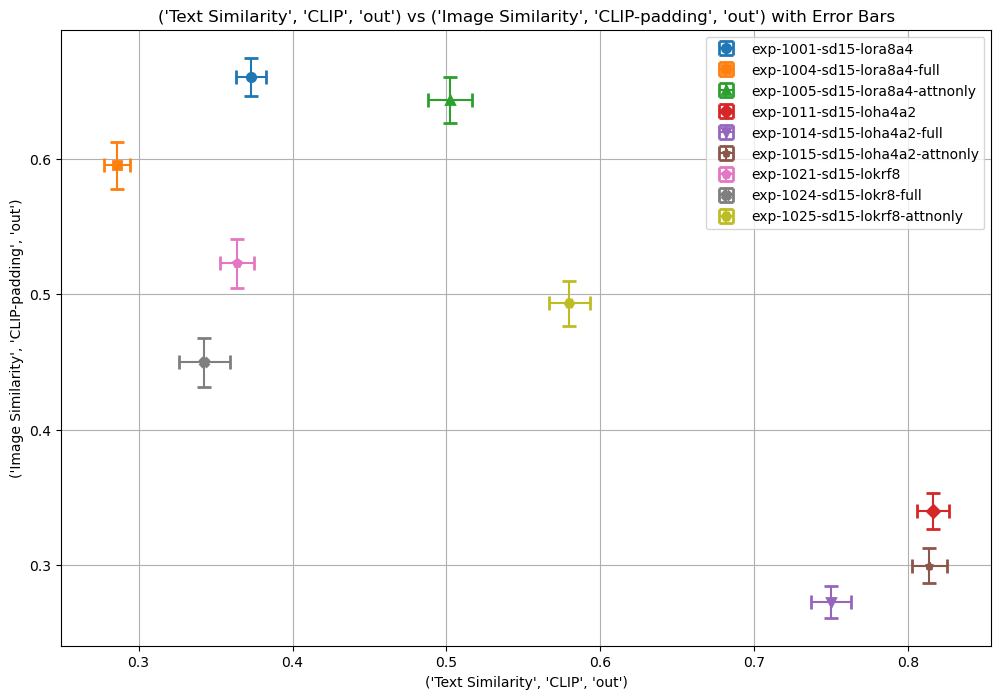

In [118]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'CLIP-padding', 'out')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

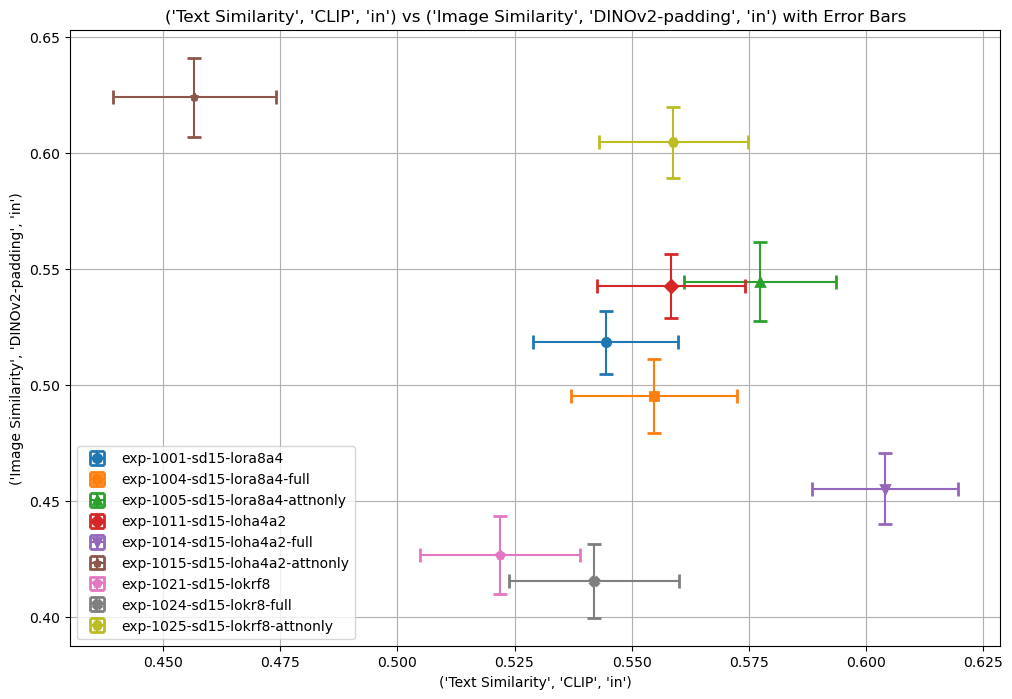

In [106]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'in')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'in')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

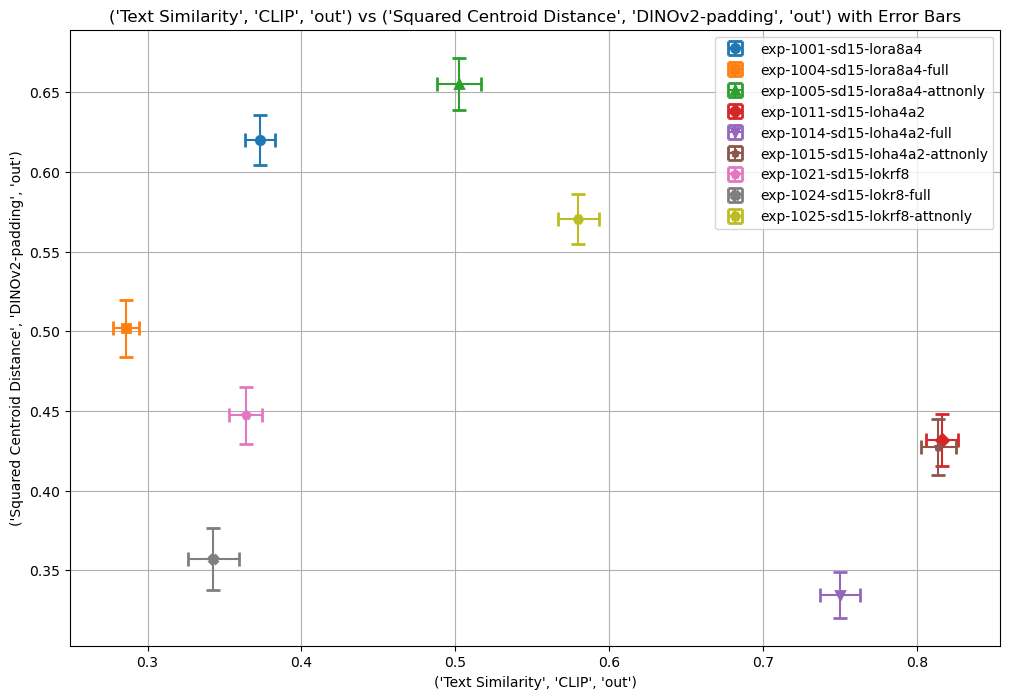

In [117]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Squared Centroid Distance', 'DINOv2-padding', 'out')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

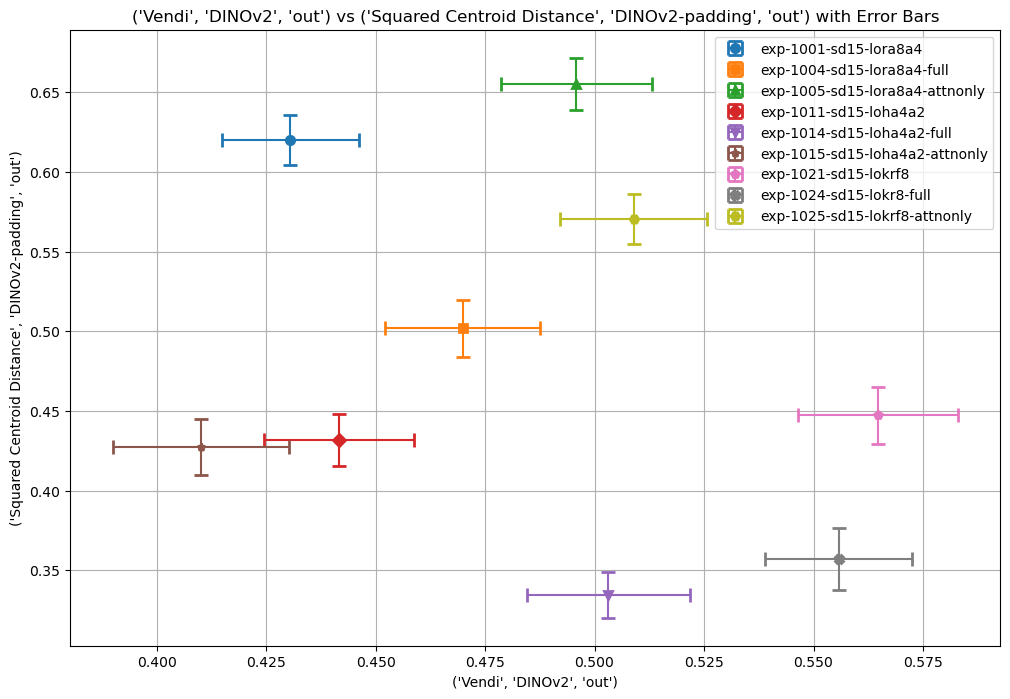

In [104]:
plt.figure(figsize=(12, 8))
metric_1 = ('Vendi', 'DINOv2', 'out')
metric_2 = ('Squared Centroid Distance', 'DINOv2-padding', 'out')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

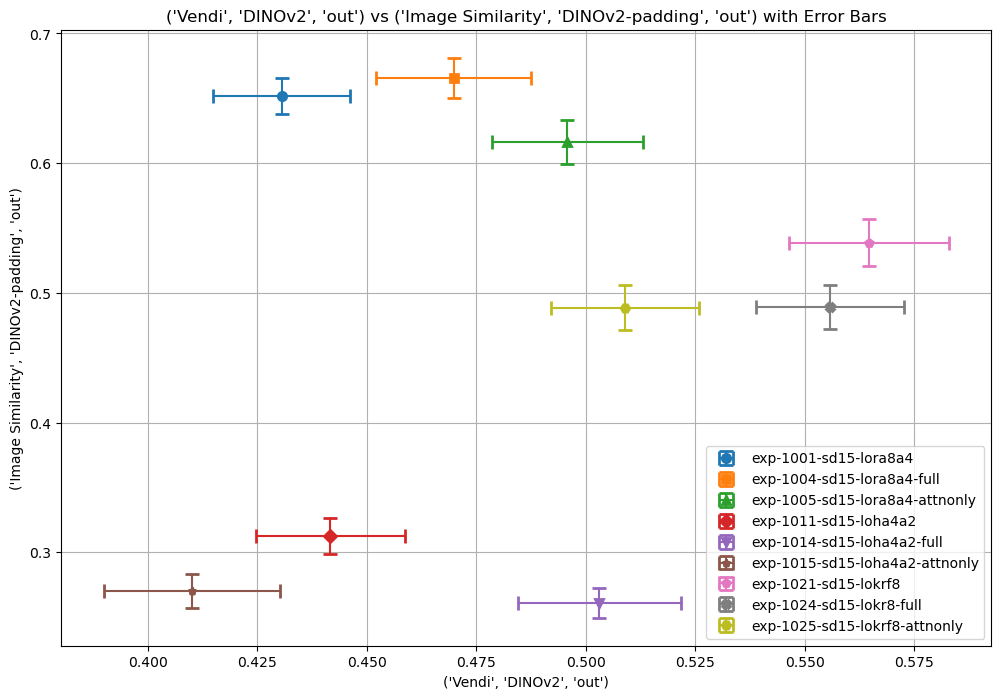

In [105]:
keywords = [
    "full", "attnonly", "1001", "1011", "1021"
]
keyword_condition = metrics_processed['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered = metrics_processed[keyword_condition]
metrics_filtered = metrics_filtered[metrics_filtered['Step'] == 30]
metrics_aggregated = aggregate_metrics(metrics_filtered, level='All', group_seeds=True)

plt.figure(figsize=(12, 8))
metric_1 = ('Vendi', 'DINOv2', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

In [119]:
metrics_processed2 = load_and_preprocess_metrics(
    metrics_file,
    config_file,
    metrics_to_include=metrics_to_include,
    keywords_to_exclude=keywords_to_exclude,
    rank=False)
keywords = [
    "full", "attnonly", "1001", "1011", "1021"
]
keyword_condition = metrics_processed2['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered2 = metrics_processed2[keyword_condition]
metrics_filtered2 = metrics_filtered2[metrics_filtered2['Step'] == 50]
metrics_aggregated2 = aggregate_metrics(metrics_filtered2, level='All', group_seeds=True)


In [111]:
with display_all_columns():
    display(metrics_filtered2)

Config  Algo    Preset      Lr      Dim Alpha  \
Architecture                                                                    
Condition                                                                       
1404              exp-1021-sd15-lokrf8  lokr  attn-mlp  0.0005  10000.0   1.0   
1405              exp-1021-sd15-lokrf8  lokr  attn-mlp  0.0005  10000.0   1.0   
1406              exp-1021-sd15-lokrf8  lokr  attn-mlp  0.0005  10000.0   1.0   
1407              exp-1021-sd15-lokrf8  lokr  attn-mlp  0.0005  10000.0   1.0   
1408              exp-1021-sd15-lokrf8  lokr  attn-mlp  0.0005  10000.0   1.0   
...                                ...   ...       ...     ...      ...   ...   
20002         exp-1024-sd15-lokr8-full  lokr      full  0.0005  10000.0   1.0   
20003         exp-1024-sd15-lokr8-full  lokr      full  0.0005  10000.0   1.0   
20004         exp-1024-sd15-lokr8-full  lokr      full  0.0005  10000.0   1.0   
20005         exp-1024-sd15-lokr8-full  lokr      full  0.0005  10000.0   1.0   
20006         exp-1024-sd15-lokr8-full  lokr      full  0.0005  10000.0   1.0   

             Factor Seed Step Category          Class   Subclass  \
Architecture                                                       
Condition                                                          
1404            8.0    c   50    scene    scene_canal              
1405            8.0    c   50    scene    scene_canal              
1406            8.0    c   50    scene    scene_canal              
1407            8.0    c   50    scene   scene_garden              
1408            8.0    c   50    scene   scene_garden              
...             ...  ...  ...      ...            ...        ...   
20002           8.0    c   50   people  Admiral_Piett  reaslitic   
20003           8.0    c   50   people  Admiral_Piett  reaslitic   
20004           8.0    c   50   people  Admiral_Piett   figurine   
20005           8.0    c   50   people  Admiral_Piett   figurine   
20006           8.0    c   50   people  Admiral_Piett   figurine   

             Image Similarity                                               \
Architecture     CLIP-padding           DINOv2-padding                       
Condition                  in       out             in       out   trigger   
1404                 0.636174  0.493955       0.565154  0.338785  0.605666   
1405                 0.636174  0.493955       0.565154  0.338785  0.605666   
1406                 0.636174  0.493955       0.565154  0.338785  0.605666   
1407                 0.735808  0.613008       0.724602  0.558615  0.846646   
1408                 0.735808  0.613008       0.724602  0.558615  0.846646   
...                       ...       ...            ...       ...       ...   
20002                0.629902  0.530961       0.479789  0.307939  0.519695   
20003                0.629902  0.530961       0.479789  0.307939  0.519695   
20004                0.621792  0.540838       0.641424  0.516950  0.672473   
20005                0.621792  0.540838       0.641424  0.516950  0.672473   
20006                0.621792  0.540838       0.641424  0.516950  0.672473   

             Squared Centroid Distance                                     \
Architecture              CLIP-padding           DINOv2-padding             
Condition                           in       out             in       out   
1404                          0.443748  0.563788       0.236387  0.443396   
1405                          0.443748  0.563788       0.236387  0.443396   
1406                          0.443748  0.563788       0.236387  0.443396   
1407                          0.392809  0.417577       0.355864  0.362355   
1408                          0.392809  0.417577       0.355864  0.362355   
...                                ...       ...            ...       ...   
20002                         0.106335  0.180448       0.047860  0.147361   
20003                         0.106335  0.180448       0.047860  0.147361   
2000

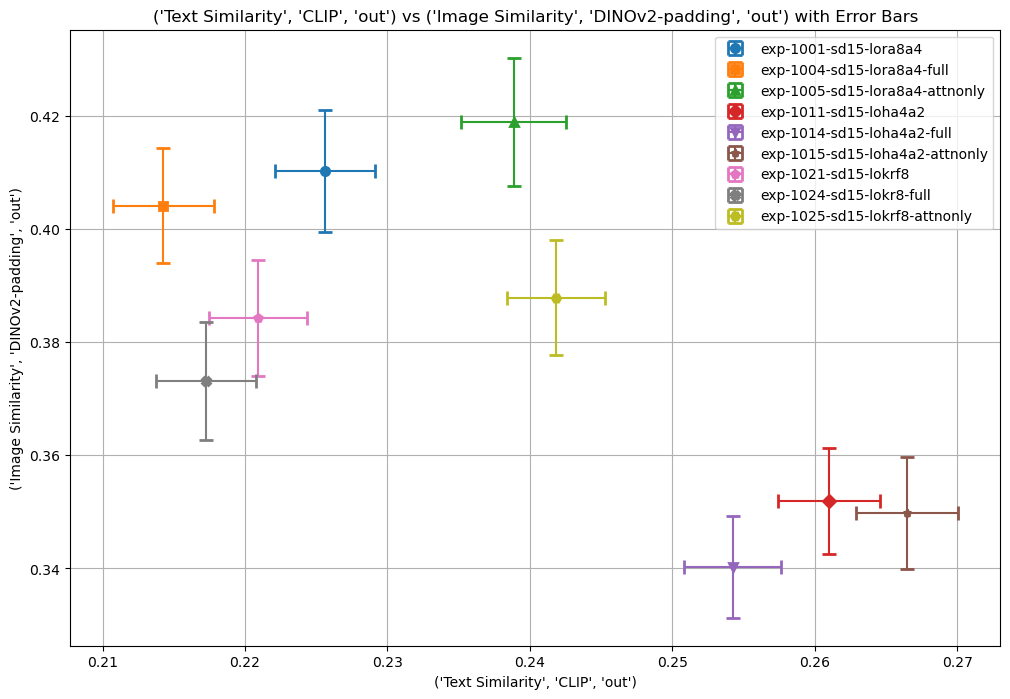

In [108]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')

plot_metrics_xy(metrics_aggregated2, metric_1, metric_2)

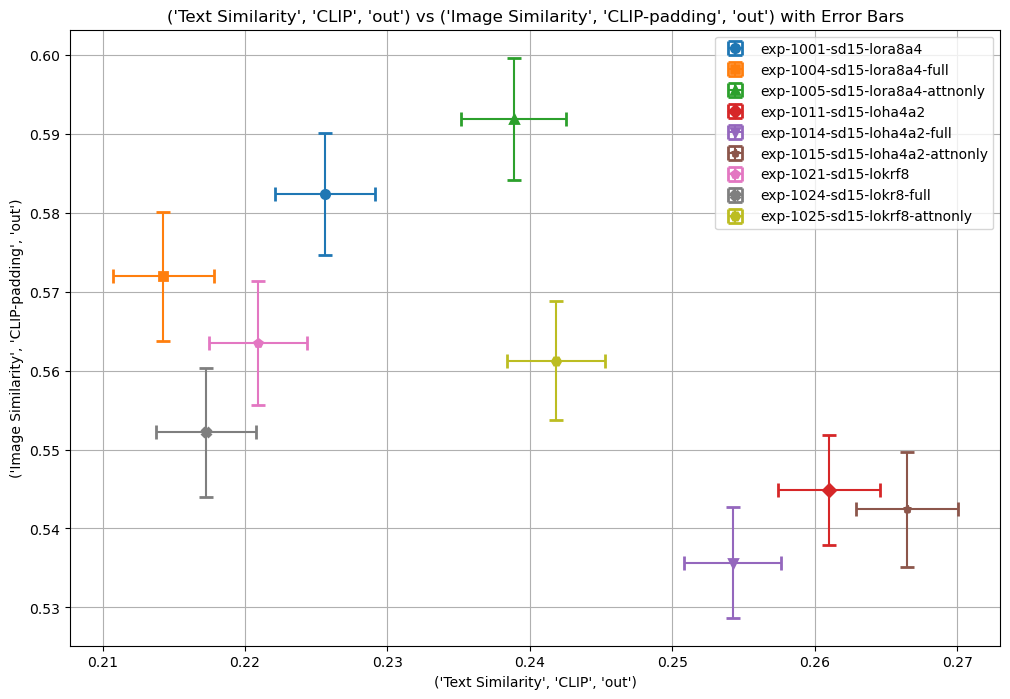

In [120]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'CLIP-padding', 'out')

plot_metrics_xy(metrics_aggregated2, metric_1, metric_2)

In [113]:
metrics_aggregated2_test = aggregate_metrics(metrics_filtered2, level='Category', group_seeds=True)


### Step=10

In [121]:
keywords = [
    "full", "attnonly", "1001", "1011", "1021"
]
keyword_condition = metrics_processed['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered = metrics_processed[keyword_condition]
metrics_filtered = metrics_filtered[metrics_filtered['Step'] == 10]
metrics_aggregated = aggregate_metrics(metrics_filtered, level='All', group_seeds=True)

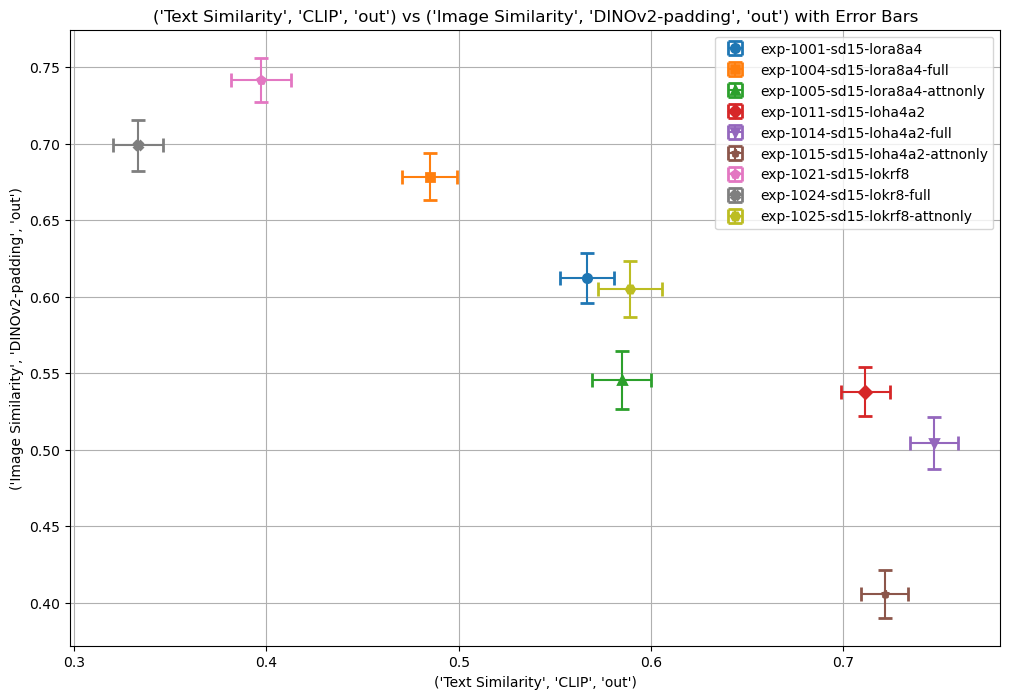

In [122]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

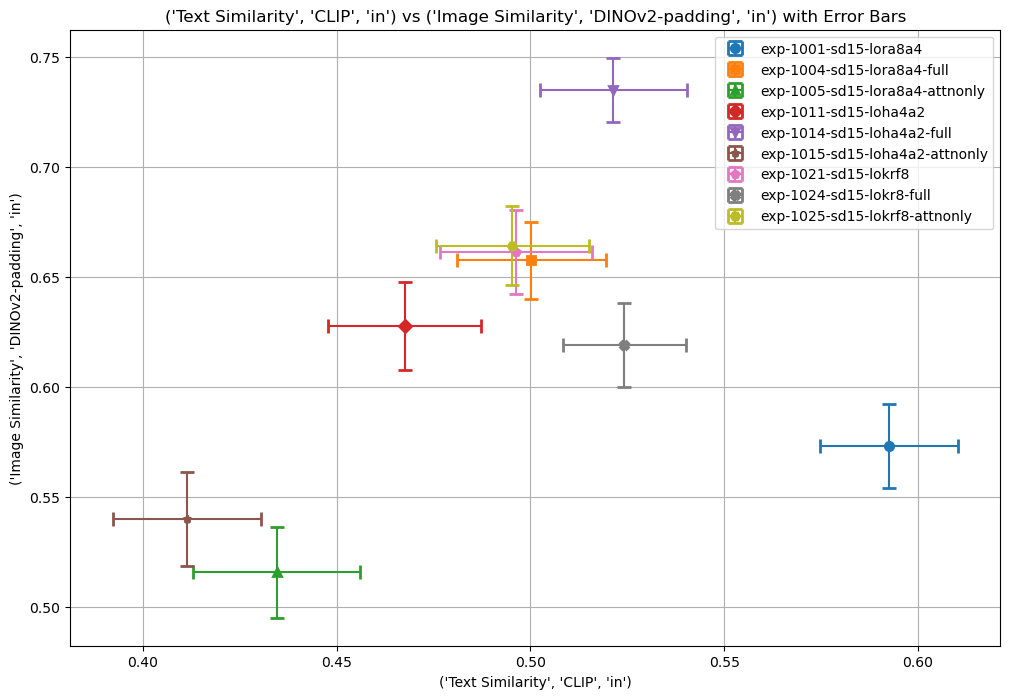

In [123]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'in')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'in')
plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

## Step

In [125]:
keywords = [
    "1001", "1011", "1021"
]
keyword_condition = metrics_processed['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered = metrics_processed[keyword_condition]
metrics_aggregated = aggregate_metrics(metrics_filtered, level='All', group_seeds=True)

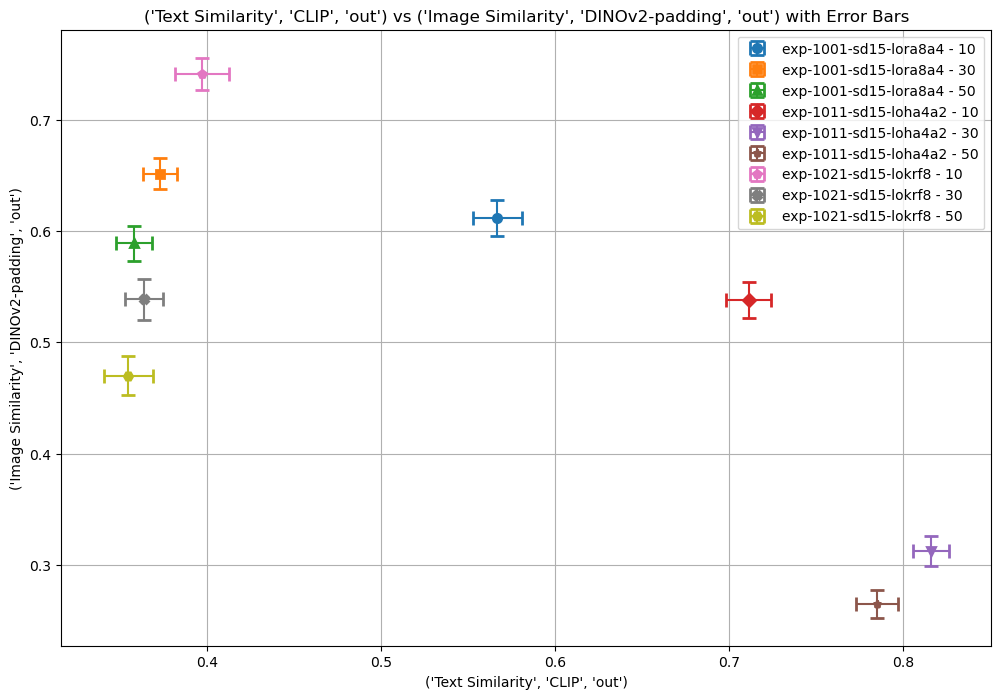

In [128]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')

plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

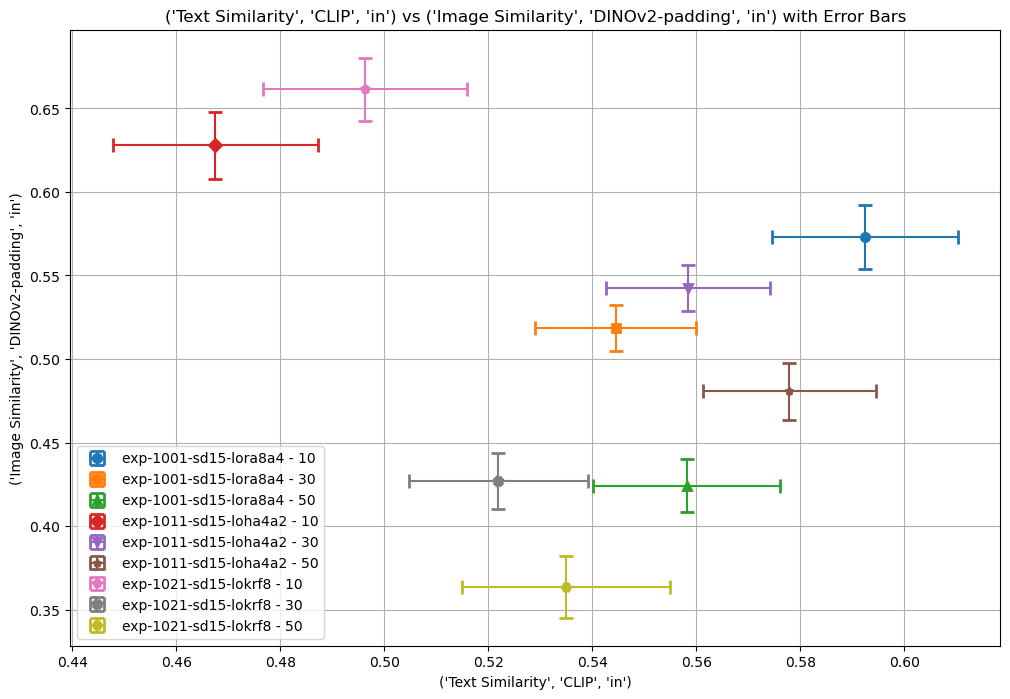

In [129]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'in')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'in')

plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

## Lr

In [28]:
keywords = [
    "1001", "1011", "1021", "lr"
]
keyword_condition = metrics_processed['Config'].apply(
    lambda x: any(keyword in x for keyword in keywords))
metrics_filtered = metrics_processed[keyword_condition]
metrics_filtered = metrics_filtered[metrics_filtered['Step']==10]
metrics_aggregated = aggregate_metrics(metrics_filtered, level='All', group_seeds=True)

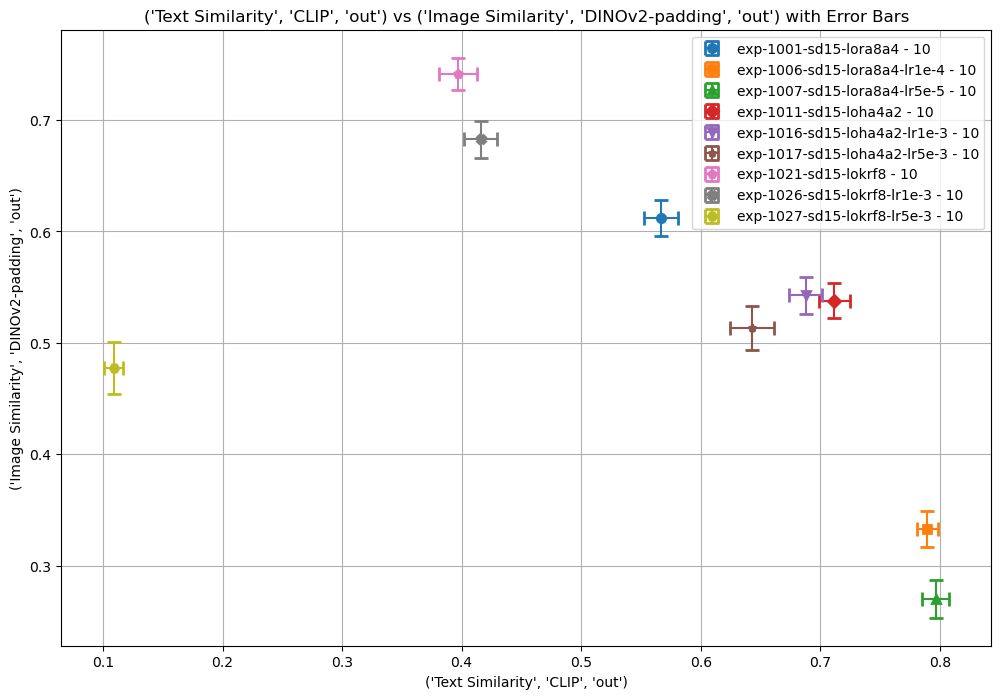

In [29]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'out')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'out')

plot_metrics_xy(metrics_aggregated, metric_1, metric_2)

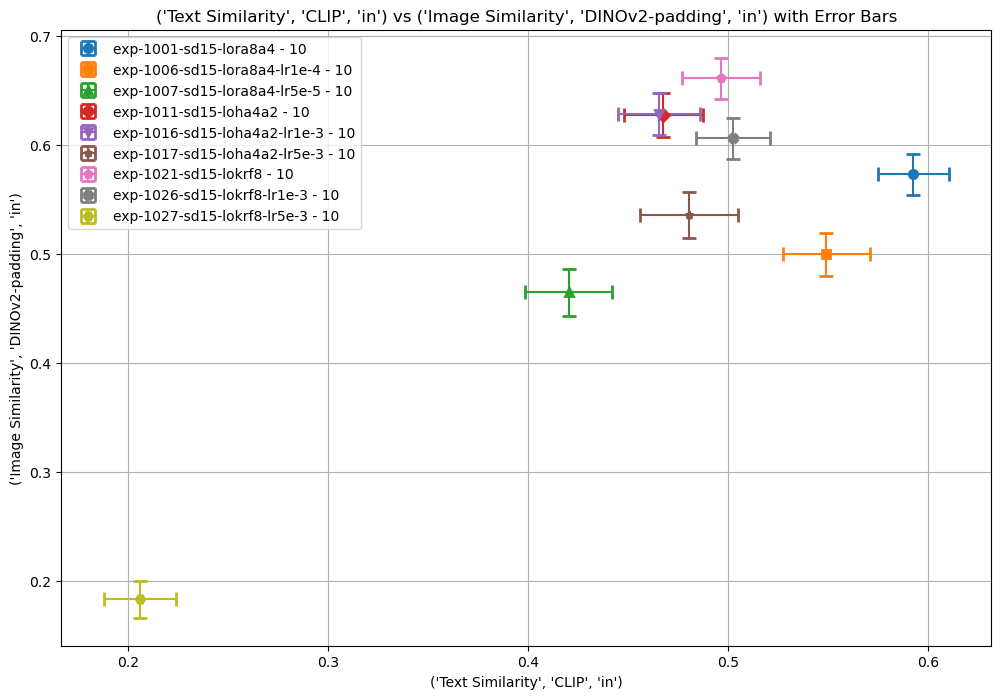

In [18]:
plt.figure(figsize=(12, 8))
metric_1 = ('Text Similarity', 'CLIP', 'in')
metric_2 = ('Image Similarity', 'DINOv2-padding', 'in')

plot_metrics_xy(metrics_aggregated, metric_1, metric_2)